In [71]:
import os
import re
import imutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image 
from PIL import Image, ImageDraw, ImageOps


In [7]:
Input_dir = '/media/vlados/FreeSpace/Kaggle' #csv files path
classes_path = '/media/vlados/FreeSpace/Kaggle/Dat/test'

In [149]:
def draw_it(raw_strokes):
        image_ = Image.new("P", (255,255), color=0)
        image_draw = ImageDraw.Draw(image_)

        for stroke in eval(raw_strokes):
            for i in range(len(stroke[0])-1):

                image_draw.line([stroke[0][i], 
                                 stroke[1][i],
                                 stroke[0][i+1], 
                                 stroke[1][i+1]],
                                fill=255, width=6)
        image_ = np.array(image_) 
        image_ = imutils.resize(image_, width=32)
        image_ = image_[:,:,np.newaxis]
        
        return (image_)

def submission_x_test(path):
    
    test = pd.read_csv(path)
    test = test.values
    
    x_test = np.zeros((len(test), 32, 32, 1), dtype='uint16')

    for i in range(len(test)):
        x_test[i] = draw_it(test[i,2])
    
    x_test = x_test.astype('float16')
    x_test /= 255
    
    return (x_test)

In [150]:
test = pd.read_csv(os.path.join(Input_dir, 'test_simplified.csv'))
test = test.values
x_test = submission_x_test(os.path.join(Input_dir, 'test_simplified.csv'))
print(test.shape, x_test.shape)
print('Test array memory {:.2f} GB'.format(x_test.nbytes / 1024.**3 ))

(112199, 3) (112199, 32, 32, 1)
Test array memory 0.21 GB


In [5]:
from keras.models import model_from_json

json_file = open("/media/vlados/FreeSpace/Kaggle/dataset/quick_doodle.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights('/media/vlados/FreeSpace/Kaggle/dataset/quick_doodle.h5')

In [151]:
test_predictions = loaded_model.predict(x_test, batch_size=128, verbose=1)

112199/112199 [==============================] - 66s 592us/step


In [100]:
def top3(predictions):
    
    classes = sorted(os.listdir(classes_path),key=str.lower)
    top_3 =  np.argsort(-predictions)[:, 0:3]
    top_3_name = np.empty(top_3.shape, dtype=object)
    
    for row in range(len(top_3)):
        for element in range(3):
            top_3_name[row,element] = re.sub(' ', '_', classes[top_3[row,element]]) 
    
    return(top_3_name)

In [152]:
top = top3(test_predictions)

preds_df = pd.DataFrame({'first': top[:,0], 'second': top[:,1], 'third': top[:,2]})
preds_df['words'] = preds_df['first'] + " " + preds_df['second'] + " " + preds_df['third']

sub = pd.read_csv(Input_dir + '/sample_submission.csv', index_col=['key_id'])
sub['word'] = preds_df.words.values
sub.to_csv('1class_per_label_proto.csv')
sub.head()

,word
key_id,
9000003627287624,mouse rain blackberry
9000010688666847,rain floor_lamp paintbrush
9000023642890129,floor_lamp rainbow carrot
9000038588854897,floor_lamp chandelier carrot
9000052667981386,mouse door chandelier


In [148]:
classes = sorted(os.listdir(classes_path),key=str.lower)
print(classes[288])

string bean


In [147]:
np.argmax(test_predictions[19,:])

288

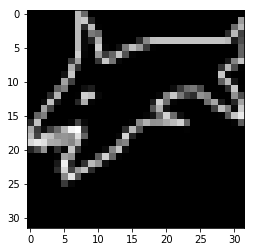

In [146]:
plt.imshow(image.array_to_img(x_test[19,:]))